<a href="https://colab.research.google.com/github/jchen0000/widsdatathon2025/blob/main/python/00_data_formating_and_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## suppose you've created a folder named "widsdatathon2025"
%cd /content/drive/MyDrive/widsdatathon2025/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/widsdatathon2025
'Data Dictionary.xlsx'   gnn/   SAMPLE_SUBMISSION.xlsx   TEST/   TRAIN/   Work/


In [ ]:
# training data
dir = './TRAIN/' #"./data/train/"
df_train_mri = pd.read_csv(dir+"TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
df_train_mri.set_index('participant_id', inplace=True)
print(df_train_mri.shape)
df_train_mri.head()

df_train_meta_quant = pd.read_excel(dir+"TRAIN_QUANTITATIVE_METADATA.xlsx")
df_train_meta_quant.set_index('participant_id', inplace=True)
print(df_train_meta_quant.shape)

df_train_meta_cat = pd.read_excel(dir+"TRAIN_CATEGORICAL_METADATA.xlsx")
df_train_meta_cat.set_index('participant_id', inplace=True)
print(df_train_meta_cat.shape)

df_train_y = pd.read_excel(dir+"TRAINING_SOLUTIONS.xlsx")
df_train_y.set_index('participant_id', inplace=True)
print(df_train_y.shape)

# Combine both columns for prediction
# (0,0): 0
# (0,1): 1
# (1,0): 2
# (1,1): 3
df_train_y_sparse = pd.DataFrame()
df_train_y_sparse['sparse_category'] = df_train_y['ADHD_Outcome'] *2 + df_train_y['Sex_F']
df_train_y_sparse.head()

(1213, 19900)
(1213, 18)
(1213, 9)
(1213, 2)


,sparse_category
participant_id,
UmrK0vMLopoR,3
CPaeQkhcjg7d,2
Nb4EetVPm3gs,2
p4vPhVu91o4b,3
M09PXs7arQ5E,3


In [ ]:
# # FAST: imputation only on meta data

# from sklearn.impute import SimpleImputer
# from sklearn.impute import KNNImputer

# df_train_meta = pd.concat([df_train_meta_cat, df_train_meta_quant], axis=1)

# df_train_meta[df_train_meta == "NA"] = np.nan

# # Impute missing values with KNN imputation
# imputer_metadata = KNNImputer(n_neighbors=5)  # Using KNN for imputation instead of mean
# df_train_meta_imputed = imputer_metadata.fit_transform(df_train_meta)  # ((1213, 19927)
# df_train_meta_imputed = pd.DataFrame(df_train_meta_imputed, columns=df_train_meta.columns, index=df_train_meta.index)
# print(df_train_meta_imputed.shape)
# df_train_meta_imputed.head(2)

# # Merge all training data together
# df_train_X = pd.concat([df_train_mri, df_train_meta_imputed], axis=1)
# print(df_train_X.shape)

In [ ]:
# # prompt: check NA value in the df_train_X_imputed variable

# import numpy as np

# # check NA in original dataset
# na_count_old = np.isnan(df_train_meta).sum()
# print(f"Number of NA values in df_train_X: {na_count_old.sum()}")
# print(f"NA value per column (>0): \n{na_count_old[na_count_old > 0]}")

# # Check for NaN values in the imputed dataset
# na_count = np.isnan(df_train_meta_imputed).sum()
# print(f"\n\nNumber of NA values in df_train_X_imputed: {na_count.sum()}")

# # Check for NaN values in each column
# na_per_column = np.isnan(df_train_meta_imputed).sum(axis=0)
# print(f"After Inputation: More than 1 NA columns: {sum(na_per_column > 0)}")
# print(f"NA values per column:\n{na_per_column.values}")


In [ ]:
# # prompt: normalize and standardize df_train_X

# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # # Normalize
# # scaler = MinMaxScaler()
# # df_train_X_normalized = scaler.fit_transform(df_train_X)
# # df_train_X_normalized = pd.DataFrame(df_train_X_normalized, columns=df_train_X.columns, index=df_train_X.index)

# # Standardize
# scaler = StandardScaler()
# df_train_X_standardized = scaler.fit_transform(df_train_X)
# df_train_X_standardized = pd.DataFrame(df_train_X_standardized, columns=df_train_X.columns, index=df_train_X.index)

# # Normalize
# scaler = MinMaxScaler()
# df_train_X_normalized = scaler.fit_transform(df_train_X_standardized)
# df_train_X_normalized = pd.DataFrame(df_train_X_normalized, columns=df_train_X.columns, index=df_train_X.index)

# df_train_X_normalized.iloc[:, -27:].describe()


In [ ]:
# Test data
dir = './TEST/'
df_test_mri = pd.read_csv(dir+"TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
df_test_mri.set_index('participant_id', inplace=True)
print(df_test_mri.shape)

df_test_meta_quant = pd.read_excel(dir+"TEST_QUANTITATIVE_METADATA.xlsx")
df_test_meta_quant.set_index('participant_id', inplace=True)
print(df_test_meta_quant.shape)

df_test_meta_cat = pd.read_excel(dir+"TEST_CATEGORICAL.xlsx")
df_test_meta_cat.set_index('participant_id', inplace=True)
print(df_test_meta_cat.shape)

(304, 19900)
(304, 18)
(304, 9)


In [ ]:
df_test_X = pd.concat([df_test_mri, df_test_meta_quant, df_test_meta_cat], axis=1)
print(df_test_X.shape)

# check NA in original dataset
na_count_old = np.isnan(df_test_X).sum()
print(f"Number of NA values in df_train_X: {na_count_old.sum()}")
print(f"NA value per column (>0): \n{na_count_old[na_count_old > 0]}")

(304, 19927)
Number of NA values in df_train_X: 459
NA value per column (>0): 
EHQ_EHQ_Total                        1
ColorVision_CV_Score                 9
APQ_P_APQ_P_CP                      15
APQ_P_APQ_P_ID                      15
APQ_P_APQ_P_INV                     15
APQ_P_APQ_P_OPD                     15
APQ_P_APQ_P_PM                      15
APQ_P_APQ_P_PP                      15
SDQ_SDQ_Conduct_Problems            30
SDQ_SDQ_Difficulties_Total          30
SDQ_SDQ_Emotional_Problems          30
SDQ_SDQ_Externalizing               30
SDQ_SDQ_Generating_Impact           30
SDQ_SDQ_Hyperactivity               30
SDQ_SDQ_Internalizing               30
SDQ_SDQ_Peer_Problems               30
SDQ_SDQ_Prosocial                   30
PreInt_Demos_Fam_Child_Ethnicity     3
PreInt_Demos_Fam_Child_Race          6
Barratt_Barratt_P1_Edu               1
Barratt_Barratt_P1_Occ               1
Barratt_Barratt_P2_Edu              36
Barratt_Barratt_P2_Occ              42
dtype: int64


In [ ]:
# DEDICATED: impute on entire inputs on both X_train and X_test

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Merge all training data together
df_train_X = pd.concat([df_train_mri, df_train_meta_cat, df_train_meta_quant], axis=1)
train_idx = df_train_X.index
print(df_train_X.shape)
df_test_X = pd.concat([df_test_mri, df_test_meta_cat, df_test_meta_quant], axis=1)
test_idx = df_test_X.index
print(df_test_X.shape)

df_X = pd.concat([df_train_X, df_test_X], axis=0)
print(df_X.shape)

df_X[df_X == "NA"] = np.nan

# Impute missing values with KNN imputation
imputer_metadata = KNNImputer(n_neighbors=5)  # Using KNN for imputation instead of mean
df_X_imputed = imputer_metadata.fit_transform(df_X)  # ((1213, 19927)
df_X_imputed = pd.DataFrame(df_X_imputed, columns=df_X.columns, index=df_X.index)
print(df_X_imputed.shape)
df_X_imputed.head(2)

df_train_X_imputed = df_X_imputed.loc[train_idx, :]
df_test_X_imputed = df_X_imputed.loc[test_idx, :]
print(df_train_X_imputed.shape, df_test_X_imputed.shape)

meta_cols = df_train_meta_cat.columns.to_list() + df_train_meta_quant.columns.to_list()
df_train_meta_imputed = df_train_X_imputed[meta_cols]
df_test_meta_imputed = df_test_X_imputed[meta_cols]
print(df_train_meta_imputed.shape)


(1213, 19927)
(304, 19927)
(1517, 19927)
(1517, 19927)
(1213, 19927) (304, 19927)


In [ ]:
df_train_meta_imputed.to_excel('./TRAIN/df_train_meta_KNN_imputed_yiru.xlsx', index=False)
df_test_meta_imputed.to_excel('./TEST/df_test_meta_imputed_yiru.xlsx', index=False)

(1213, 27)


### reshape connectome matrix

In [ ]:
# prompt: write a re function to extract the numbers from a string with format "Nthrow_Mthcolumn" where N and M is the number we need, return N and M. example string could be "19throw_199thcolumn"

import re

def extract_numbers(input_string):
  """Extracts N and M from a string with the format 'Nthrow_Mthcolumn'.

  Args:
    input_string: The input string to extract numbers from.

  Returns:
    A tuple containing N and M as integers, or None if the string doesn't
    match the expected format.
  """
  match = re.match(r"(\d+)throw_(\d+)thcolumn", input_string)
  if match:
    n = int(match.group(1))
    m = int(match.group(2))
    return n, m
  return None, None

# Example usage
string = "0throw_19thcolumn"
result = extract_numbers(string)
if result:
  n, m = result
  print(f"N: {n}, M: {m}")
else:
  print("String does not match the expected format.")


N: 0, M: 19


In [ ]:
# prompt: reformat the df_train_mri data to an array of (1213, 200, 200) connectome matrix, based on the column name indicating Nthrow_Mthcolumn, putting the diagnal value as 1 for each. The matrix should be proportional. The df_train_mri have shape of (1213, 19900) with each row as a sample point

def create_connectome_matrix(row):
  """Creates a connectome matrix from a row of the dataframe.

  Args:
    row: A pandas Series representing a row of df_train_mri.

  Returns:
    A NumPy array representing the connectome matrix.
  """
  # print(row)

  matrix = np.zeros((200, 200))
  for col_name, value in row.items():
    if isinstance(col_name, str):
      try:
        # print(col_name)
        nth_row, mth_col = extract_numbers(col_name)
        # print(nth_row, mth_col)
        if nth_row is not None and nth_row < 200 and mth_col < 200:
          matrix[nth_row, mth_col] = value
          matrix[mth_col, nth_row] = value
          # if nth_row < 5 and mth_col < 5:
          #   print(matrix[:5, :5])
      except ValueError:
        print('value error detected')
        pass  # Ignore columns that don't match the pattern
  np.fill_diagonal(matrix, 1)
  # print(matrix[:5,:5])
  return matrix


connectome_matrices = np.array([create_connectome_matrix(row) for _, row in df_train_mri.iterrows()])
connectome_matrices_test = np.array([create_connectome_matrix(row) for _, row in df_test_mri.iterrows()])
connectome_matrices.shape

# print(df_train_mri.iloc[0:5, :5])
# connectome_matrices[1,:5,:5]


(1213, 200, 200)

In [ ]:
connectome_matrices_test = np.array([create_connectome_matrix(row) for _, row in df_test_mri.iterrows()])
connectome_matrices_test.shape

(304, 200, 200)

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


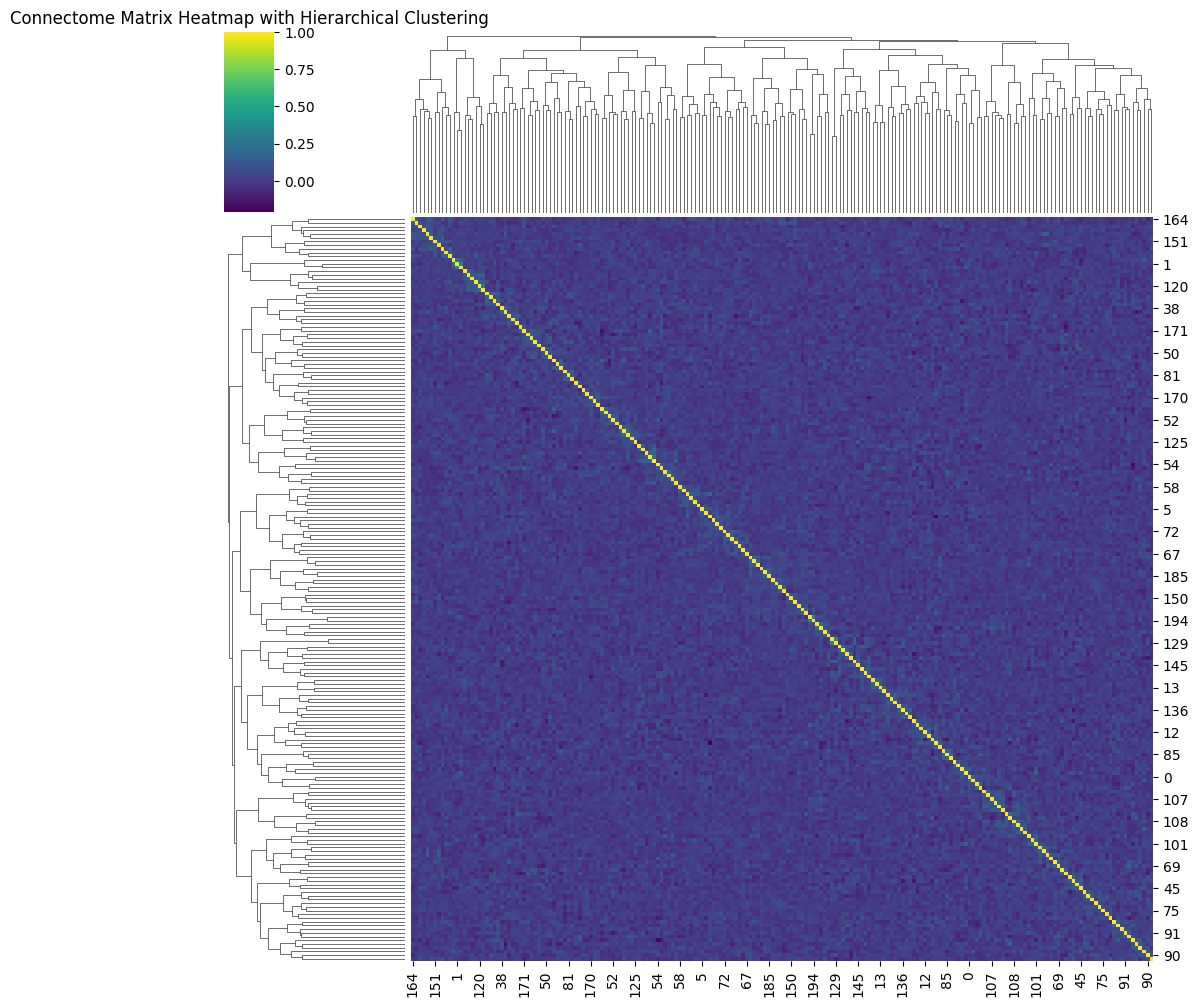

In [ ]:
# prompt: plot heatmap on the connectome_matrices, select a sample as example, plot with hierachical clustering. using available packages directly

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Select a sample connectome matrix (e.g., the first one)
sample_matrix = connectome_matrices[0]

# Create a heatmap with hierarchical clustering
sns.clustermap(sample_matrix, method='ward', cmap='viridis', figsize=(10, 10))
plt.title('Connectome Matrix Heatmap with Hierarchical Clustering')
plt.show()


In [ ]:
# prompt: save the connectome_matrices and connectome_matrices_test to disk with the best practices to save numpy array file

np.save('./TRAIN/connectome_matrices_train.npy', connectome_matrices)
np.save('./TEST/connectome_matrices_test.npy', connectome_matrices_test)


In [ ]:
# prompt: load the two connectome matrices from npy file

connectome_matrices = np.load('./TRAIN/connectome_matrices_train.npy')
connectome_matrices_test = np.load('./TEST/connectome_matrices_test.npy')

print(connectome_matrices.shape)
print(connectome_matrices_test.shape)


(1213, 200, 200)
(304, 200, 200)


### OPTIONAL: train_test_split

In [ ]:
# prompt: split df_train_X and df_train_y into train and validation set and convert df into arrays able to be input into keras model

from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train_mri, X_val_mri, X_train_meta, X_val_meta, y_train, y_val = train_test_split(connectome_matrices, df_train_meta_imputed, df_train_y, test_size=0.2, random_state=42)

# Convert DataFrames to NumPy arrays
X_train_meta = X_train_meta.values
X_val_meta = X_val_meta.values
y_train = y_train.values
y_val = y_val.values

print(X_train_mri.shape)
print(X_train_meta.shape)
print(y_val.shape)

In [ ]:
# prompt: save all train and val arrays into one data file. use best practices to prevent data loss

import numpy as np

# Assuming you have X_train_mri, X_val_mri, X_train_meta, X_val_meta, y_train, y_val defined
# as NumPy arrays or Pandas DataFrames

# Create a dictionary to store all the arrays
data = {
    'X_train_mri': X_train_mri,
    'X_val_mri': X_val_mri,
    'X_train_meta': X_train_meta,
    'X_val_meta': X_val_meta,
    'y_train': y_train,
    'y_val': y_val
}

# Save the dictionary to a .npz file using numpy.savez_compressed
np.savez_compressed('./PYTHON_DATA/train_val_data.npz', **data)

# To load the data later:
# loaded_data = np.load('./TRAIN/train_val_data.npz')
# X_train_mri = loaded_data['X_train_mri']
# ... and so on for other arrays

